In [1]:
# Import dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
df= pd.read_csv('TotalVacancies_Q32015_Q42019_2021_11_12.csv')
df.head()

,Unnamed: 0,REF_DATE,GEO,DGUID,National Occupational Classification,Job vacancy characteristics,Statistics,VALUE,STATUS
0,1143184,2015-04,Canada,2016A000011124,"Total, all occupations","Type of work, all types",Job vacancies,451925.0,A
1,2286368,2015-07,Canada,2016A000011124,"Total, all occupations","Type of work, all types",Job vacancies,407865.0,A
2,3429552,2015-10,Canada,2016A000011124,"Total, all occupations","Type of work, all types",Job vacancies,358755.0,A
3,4572736,2016-01,Canada,2016A000011124,"Total, all occupations","Type of work, all types",Job vacancies,330215.0,A
4,5715920,2016-04,Canada,2016A000011124,"Total, all occupations","Type of work, all types",Job vacancies,391190.0,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            19 non-null     int64  
 1   REF_DATE                              19 non-null     object 
 2   GEO                                   19 non-null     object 
 3   DGUID                                 19 non-null     object 
 4   National Occupational Classification  19 non-null     object 
 5   Job vacancy characteristics           19 non-null     object 
 6   Statistics                            19 non-null     object 
 7   VALUE                                 19 non-null     float64
 8   STATUS                                19 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ KB


In [4]:
# drop all unnecessary columns 
df = df.loc[:,['REF_DATE','VALUE']]
df.head()
            

,REF_DATE,VALUE
0,2015-04,451925.0
1,2015-07,407865.0
2,2015-10,358755.0
3,2016-01,330215.0
4,2016-04,391190.0


In [5]:
df.rename(columns={'VALUE':'TotalVacancies'}, inplace=True)
df.head()

,REF_DATE,TotalVacancies
0,2015-04,451925.0
1,2015-07,407865.0
2,2015-10,358755.0
3,2016-01,330215.0
4,2016-04,391190.0


In [6]:
df['TotalVacancies'].sum()

8775240.0

In [7]:
#  convert the REF_DATE column into a datetime object
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m')
df.head()

,REF_DATE,TotalVacancies
0,2015-04-01,451925.0
1,2015-07-01,407865.0
2,2015-10-01,358755.0
3,2016-01-01,330215.0
4,2016-04-01,391190.0


In [46]:
df.set_index('REF_DATE', inplace=True)

In [47]:
df.shape

(19, 1)

In [50]:
df.values

array([[451925.],
       [407865.],
       [358755.],
       [330215.],
       [391190.],
       [404860.],
       [381010.],
       [387080.],
       [459685.],
       [467395.],
       [469360.],
       [461845.],
       [546820.],
       [550670.],
       [547330.],
       [506140.],
       [581595.],
       [562910.],
       [508590.]])

## Time series Analysis 2

In [51]:
#visualize the time series data

(array([16617., 16801., 16983., 17167., 17348., 17532., 17713., 17897.,
        18078.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

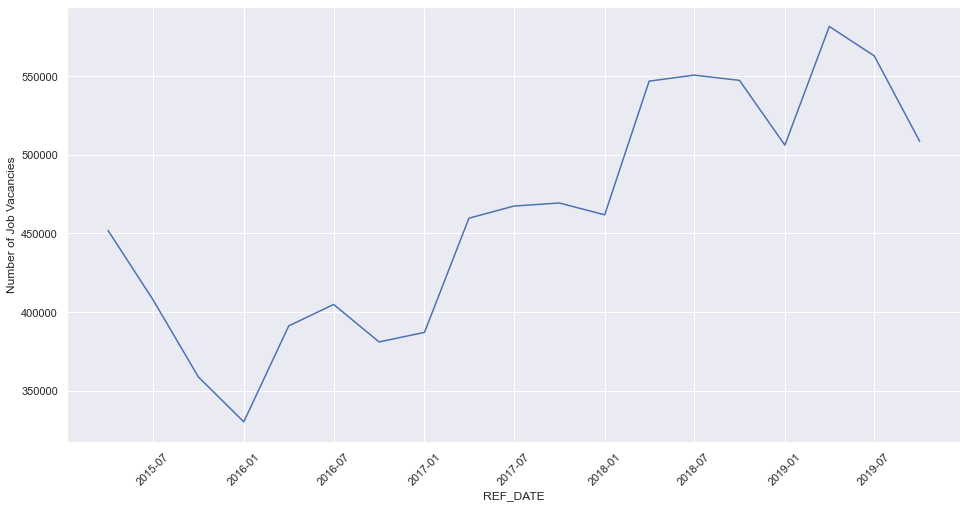

In [52]:
sns.lineplot(data= df, x='REF_DATE', y= 'TotalVacancies')
plt.ylabel('Number of Job Vacancies')
plt.xticks(rotation=45)

In [53]:
df.dtypes

TotalVacancies    float64
dtype: object

In [54]:
df.shape

(19, 1)

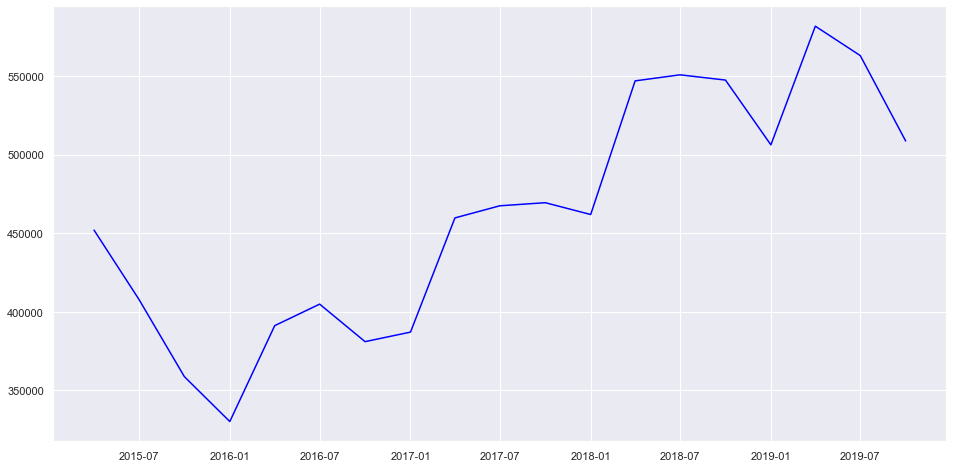

In [55]:
plt.plot(df, color="blue",label="Original vacancies Data")

In [56]:
df.shape

(19, 1)

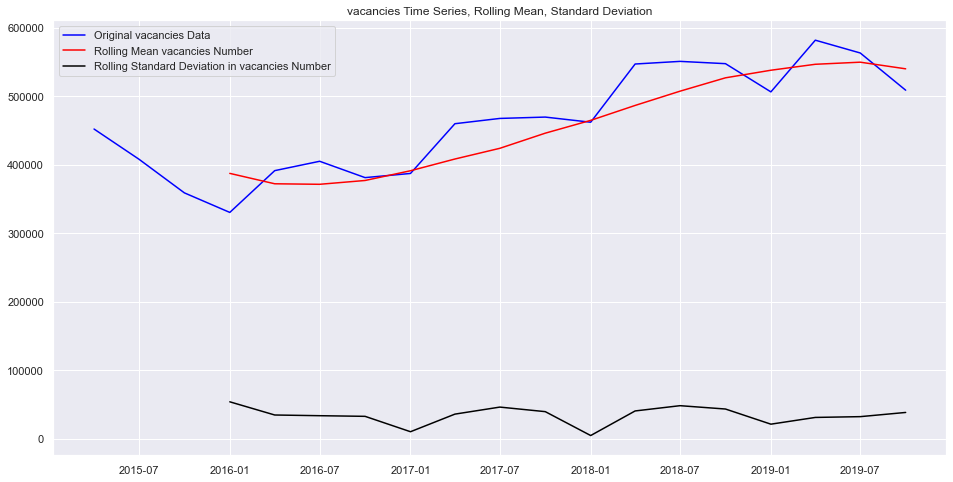

In [58]:
'''check for stationary
A stationary time series will not have any trends or seasonal patterns
We will use the Dickey Fuller test to check for stationarity in our data '''

rolling_mean = df.rolling(4).mean()
rolling_std = df.rolling(4).std()

#First, let’s make a Matplotlib plot of our time series
plt.plot(df, color="blue",label="Original vacancies Data")
# then the rolling mean
plt.plot(rolling_mean, color="red", label="Rolling Mean vacancies Number")
#And finally, the rolling standard deviation:
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in vacancies Number")
#Let’s then add a title:
plt.title("vacancies Time Series, Rolling Mean, Standard Deviation")
#And a legend:
plt.legend(loc="best")

In [59]:
#We will use the Dickey Fuller test to check for stationarity in our data
from statsmodels.tsa.stattools import adfuller
df_test=df.iloc[:,0].values
adft = adfuller(df_test,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

      Values                       Metric
0  -1.396640              Test Statistics
1   0.583886                      p-value
2   7.000000             No. of lags used
3  11.000000  Number of observations used
4  -4.223238          critical value (1%)
5  -3.189369          critical value (5%)
6  -2.729839         critical value (10%)


our data is not stationary as p value is higher than 0.05

In [60]:
# Checking for autocorrelation in time series data
# This is a measure of how correlated time series data is at a given point in time with past values
autocorrelation_lag1 = df['TotalVacancies'].autocorr(lag=1)
print("One Quarter Lag: ", autocorrelation_lag1)

One Quarter Lag:  0.8380764708563181


In [61]:
autocorrelation_lag2 = df['TotalVacancies'].autocorr(lag=2)
print("Two Quaretrs Lag: ", autocorrelation_lag2)

autocorrelation_lag3 = df['TotalVacancies'].autocorr(lag=3)
print("Three Quaretrs Lag: ", autocorrelation_lag3)

autocorrelation_lag4 = df['TotalVacancies'].autocorr(lag=4)
print("Four Quaretrs Lag: ", autocorrelation_lag4)

Two Quaretrs Lag:  0.695555219079688
Three Quaretrs Lag:  0.6984699858483016
Four Quaretrs Lag:  0.7744232851215945


the data is autocorrelated

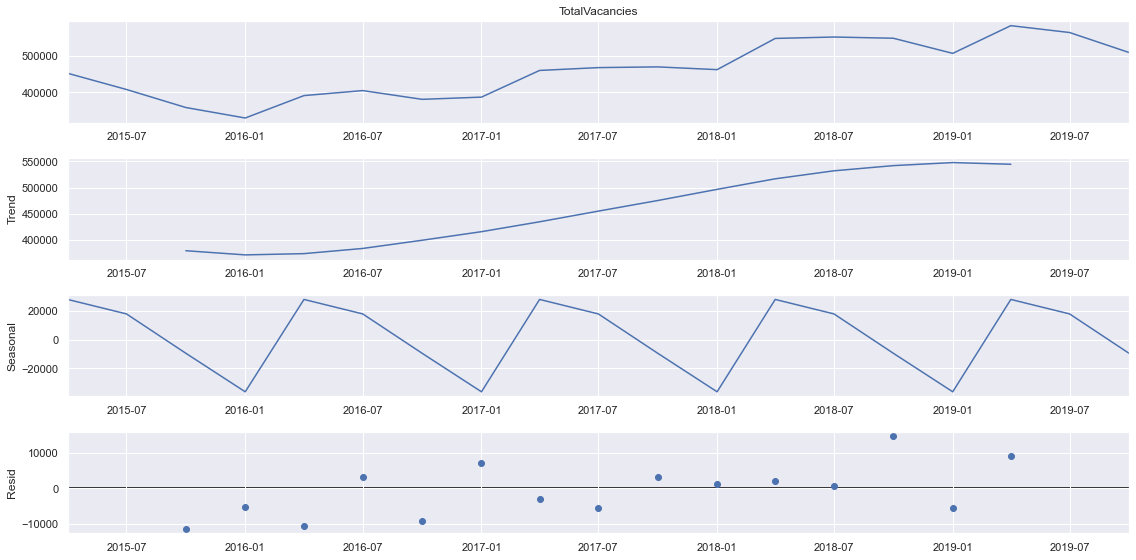

In [62]:
#Check for Trend decomposition is another useful way to visualize the trends in time series data
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['TotalVacancies'],model='additive', period=4)
decompose.plot()
plt.show()

In [63]:
df.dtypes

TotalVacancies    float64
dtype: object

From this plot, we can clearly see the increasing trend in number of vacancies and the seasonality patterns in the rise and fall in values each year.

C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


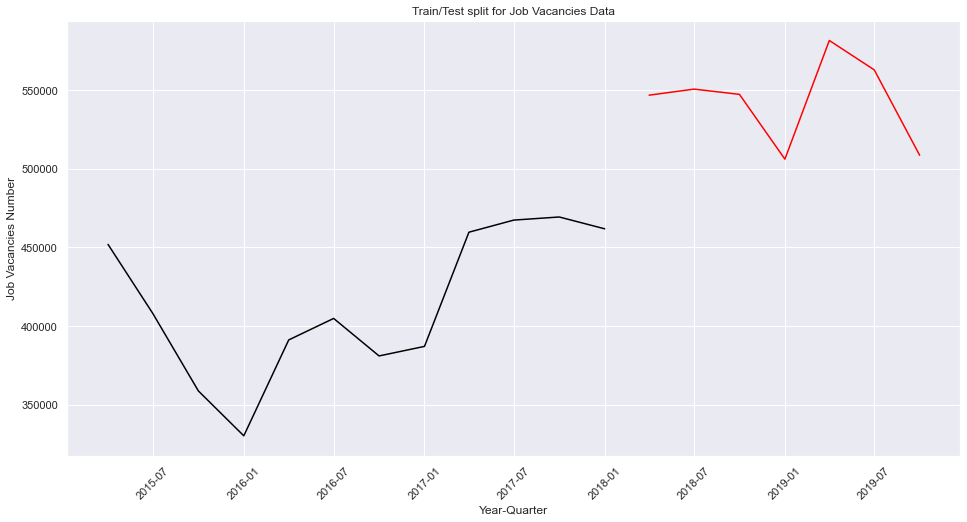

In [65]:
# Forescasting
#Time series forecasting allows us to predict future values in a time series given current and past data
df['REF_DATE']=df.index
train = df[df['REF_DATE'] < "2018-04-01"]
train['train'] = train['TotalVacancies']
del train['REF_DATE']
del train['TotalVacancies']

test = df[df['REF_DATE'] >= "2018-04-01"]
del test['REF_DATE']
test['test'] = test['TotalVacancies']
del test['TotalVacancies']

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Job Vacancies Data")
plt.ylabel("Job Vacancies Number")
plt.xlabel('Year-Quarter')
plt.xticks(rotation=45)
sns.set()
plt.show()

In [66]:
df.dtypes

TotalVacancies           float64
REF_DATE          datetime64[ns]
dtype: object

In [82]:
# import auto_arima from the pdmarima package, train our model and generate predictions using ARIMA
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=295.179, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=290.627, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=290.766, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=346.617, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=290.311, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=292.607, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=295.140, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=291.217, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=295.395, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.016 seconds


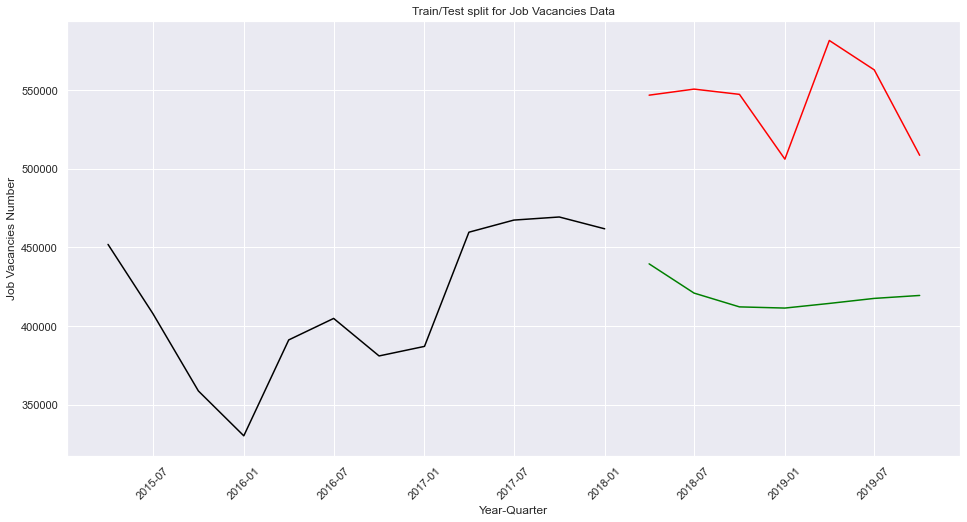

In [81]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast['Prediction'],color= 'green')
plt.title("Train/Test split for Job Vacancies Data")
plt.ylabel("Job Vacancies Number")
plt.xlabel('Year-Quarter')
plt.xticks(rotation=45)
sns.set()
plt.show()

In [69]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  126809.35552984365


In [30]:
#linear regression

In [31]:
#import dependencies
from pathlib import Path
from sklearn.linear_model import LinearRegression

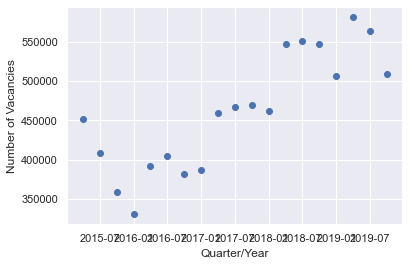

In [32]:
plt.scatter(df.REF_DATE, df.TotalVacancies)
plt.xlabel('Quarter/Year')
plt.ylabel('Number of Vacancies')
plt.show()

In [33]:
X= df.TotalVacancies.values.reshape(-1,1)

In [34]:
X.shape

(19, 1)

In [35]:
y=df.REF_DATE

In [36]:
# Create a model with scikit-learn
model = LinearRegression()

In [37]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

In [38]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(19,)


In [39]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

OverflowError: int too big to convert

<Figure size 432x288 with 1 Axes>

In [40]:
import sys

In [41]:
 sys.maxsize

9223372036854775807

In [42]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[4.91065627e+11]
1.2720980458636298e+18


## SARIMA

source: https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

In [43]:
%matplotlib inline

In [44]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
# Register converters to avoid warnings
pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [79]:
# Dataset
data = df
data.index = data.REF_DATE
# Set the frequency
data.index.freq="QS-OCT"

# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['TotalVacancies'], trend='c', order=(1,1,1),seasonal_order=(0, 1, 2, 4))
res = mod.fit(disp=False)
print(res.summary())

C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\wisam\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                                       SARIMAX Results                                        
Dep. Variable:                         TotalVacancies   No. Observations:                   19
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 4)   Log Likelihood                -165.344
Date:                                Fri, 12 Nov 2021   AIC                            342.688
Time:                                        15:53:42   BIC                            346.522
Sample:                                    04-01-2015   HQIC                           342.333
                                         - 10-01-2019                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.657e+04      0.004  -4.59e+06      0.000   -1.66e+04   -1.66e+04
ar.